In [93]:
from simple_esn import SimpleESN
import matplotlib.pyplot as plt
import numpy as np
import librosa
import soundfile as sf
import pandas as pd
import scipy.linalg as la
from IPython import display
from sklearn.utils import check_random_state, check_array
import time

from pythonosc import udp_client, dispatcher, osc_server
import argparse

import seaborn as sns

In [2]:
from pylab import rcParams

In [3]:
from pythonosc import udp_client, dispatcher, osc_server
import argparse


In [195]:
from IPython.core.display import HTML
style = """
<style>
div.output_wrapper {
    overflow: show;
}
div.output_scroll {
    min-height: 700px;
    overflow: show;
    
}
div.output_area img {
    max-width: unset;
}
</style>
"""
HTML(style) 

In [10]:
y, sr = librosa.load('VPRYNIMVMT2.wav')
y = y/max(y)

In [4]:
# for outgoing messages
outparser = argparse.ArgumentParser()
outparser.add_argument("--ip", default='192.168.1.100', help='The ip of the OSC server')
outparser.add_argument("--port", type=int, default=8000, help="The port the OSC server is listening on")
args = outparser.parse_args()

client = udp_client.SimpleUDPClient(args.ip, args.port)

usage: ipykernel_launcher.py [-h] [--ip IP] [--port PORT]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\hurgdburg\AppData\Roaming\jupyter\runtime\kernel-ef9de47d-aedd-48b0-8bbe-f78bc849fb8c.json


SystemExit: 2

C:\Users\hurgdburg\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [41]:
%matplotlib inline


In [142]:
esn = SimpleESN(n_readout=25, n_components=25, n_inputs=1, input_gain=3, input_sparcity=1, damping=0.7, random_state=95326, weight_scaling=1.15, sparcity=0.05)

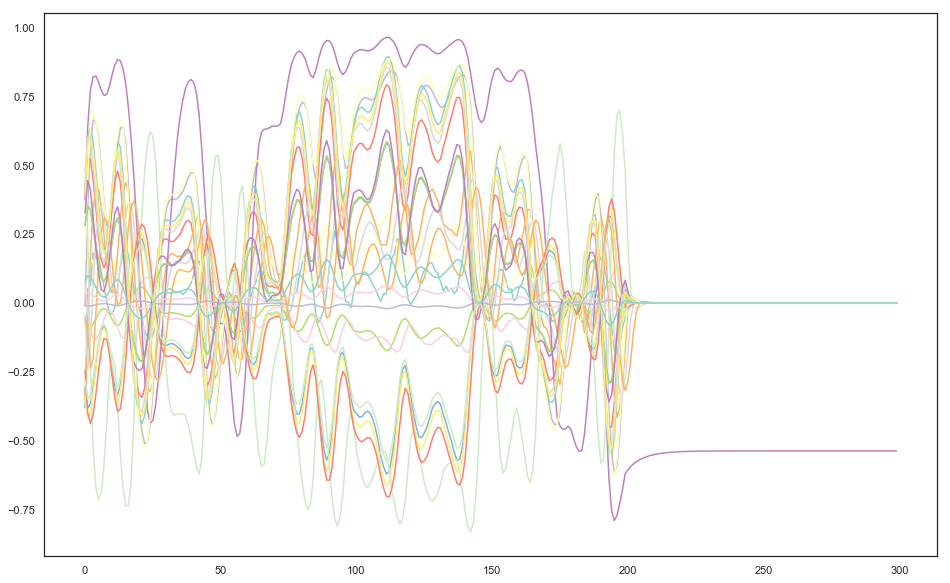

In [143]:
%matplotlib inline
output = []
fig = plt.gcf()
fig.set_size_inches(16,10)
for i in range(200):
    step=[y[400000+i]]
   
    output.append(esn.step(step))
    
    plt.clf()
    plt.ylim(-1,1)
    plt.plot(np.array(output[:][-250:]))
    
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.05)

# print(len(np.array(output[0:100]).T[0][0]))
    
for j in range(100):
    output.append(esn.step([0]))
    plt.clf()
    plt.plot(np.array(output))
    fig = plt.gcf()
    
    display.display(fig)
    
    display.clear_output(wait=True)
    time.sleep(0.0001)
    


[(-1, 1)]

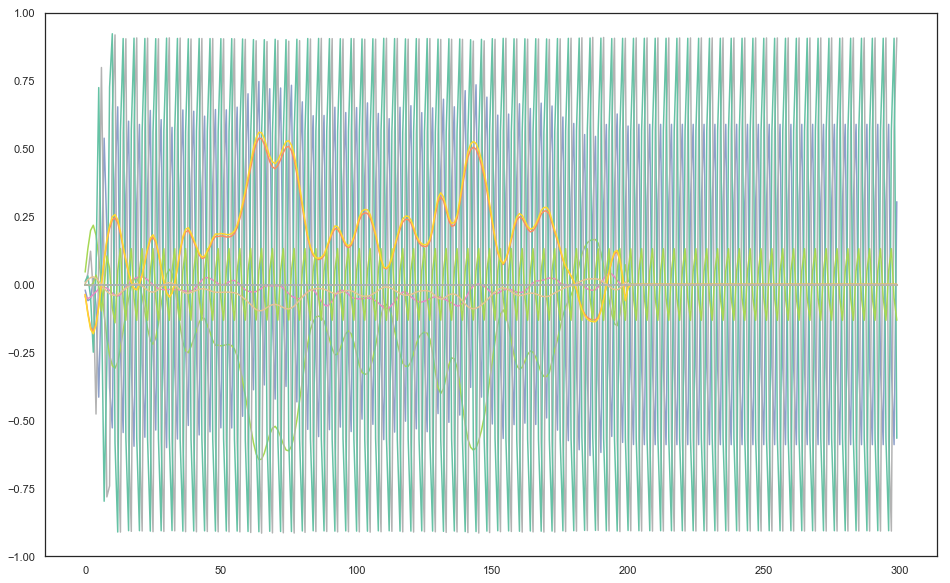

In [248]:
#  df = pd.DataFrame(dict(time=np.arange(25),
#                          value=np.array(output[])))
esn = SimpleESN(n_readout=16, n_components=16, n_inputs=2, input_gain=3, input_sparcity=0.3, damping=0.8, random_state=95328, weight_scaling=3, sparcity=0.0685)

fig = plt.gcf()
fig.set_size_inches(16,10)

output = []
for i in range(200):
    step=[y[400000+i],y[500000+i]]
   
    output.append(esn.step(step))

    
for j in range(100):
    output.append(esn.step([0,0]))

plot = sns.lineplot(data=np.array(output),dashes=False, legend=False)
plot.set(ylim=(-1,1))



In [ ]:

plot.get_figure().savefig('output.png')

In [167]:
np.asarray(output).T

array([[-3.80729776e-01,  5.13644993e-02,  6.49139533e-02, ...,
        -4.47967549e-31,  2.26223612e-31, -1.14242924e-31],
       [ 1.46147969e-01,  1.81881443e-01,  1.71844464e-01, ...,
         9.96993670e-54,  2.99098101e-54,  8.97294303e-55],
       [-1.10636641e-02,  3.54531893e-01,  5.79338170e-01, ...,
         4.27428682e-49,  1.30849585e-49,  4.00491227e-50],
       ...,
       [-2.79668332e-01, -3.49238801e-01, -3.32571760e-01, ...,
        -1.99090784e-53, -5.97272351e-54, -1.79181705e-54],
       [ 4.00036490e-01,  5.75764798e-01,  6.05998013e-01, ...,
         2.58569506e-51,  7.83554671e-52,  2.37420247e-52],
       [ 7.96702926e-02,  9.90636252e-02,  9.34121052e-02, ...,
         5.37815601e-54,  1.61344680e-54,  4.84034041e-55]])

fig=plt.gcf()
fig.savefig('output.png')

In [180]:
output

[array([-0.08018933,  0.02820622, -0.00210752,  0.08428048, -0.06196057,
        -0.07251566, -0.01456568,  0.01302708, -0.00802957,  0.07859145,
         0.09751139, -0.06972898,  0.08989218,  0.02958073, -0.00181625,
        -0.04844436,  0.05642991, -0.01045161,  0.05720927,  0.00548249,
         0.10744122,  0.06668438, -0.0560403 ,  0.08529971,  0.01523396]),
 array([-0.05794331,  0.04352617,  0.04593508,  0.135001  , -0.09565521,
        -0.06874539, -0.02269766,  0.00583382, -0.03526705,  0.15465642,
         0.10952702, -0.10692705,  0.15237992,  0.08737814, -0.00280242,
        -0.08735387,  0.08710881, -0.01940294,  0.088313  ,  0.00845934,
         0.16605319,  0.10791121, -0.08650684,  0.14384144,  0.02350627]),
 array([-0.01902751,  0.04864351,  0.10808075,  0.15560814, -0.10699487,
        -0.02579794, -0.02559362, -0.00841927, -0.04749019,  0.22080774,
         0.05724432, -0.11887487,  0.18469946,  0.14582788, -0.00313119,
        -0.11061167,  0.09741689, -0.03436317, 

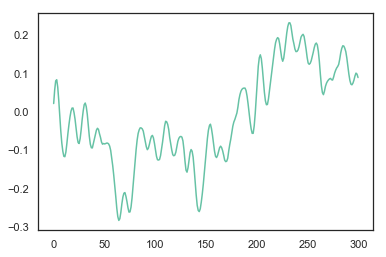

In [223]:

plt.plot( range(300), y[500000:500300])

In [205]:
sns.set()
sns.set_style('white')
sns.set_palette(sns.color_palette('Set2', 25))


In [36]:
choose_colorbrewer_palette()

NameError: name 'choose_colorbrewer_palette' is not defined

In [12]:
np.max(np.abs(la.eig(esn.weights_)[0]))

1.1499999999999926

([array([1., 0., 0., 0., 4., 0., 0., 0., 1., 1.]),
  array([0., 1., 0., 0., 4., 0., 1., 1., 0., 0.]),
  array([0., 2., 0., 0., 4., 0., 0., 0., 1., 0.]),
  array([0., 0., 1., 0., 4., 1., 0., 1., 0., 0.]),
  array([1., 2., 0., 0., 3., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 3., 1., 1., 0., 0., 1.]),
  array([1., 1., 0., 0., 5., 0., 0., 0., 0., 0.])],
 array([-0.81261474, -0.63343925, -0.45426376, -0.27508827, -0.09591278,
         0.08326271,  0.26243819,  0.44161368,  0.62078917,  0.79996466,
         0.97914015]),
 <a list of 7 Lists of Patches objects>)

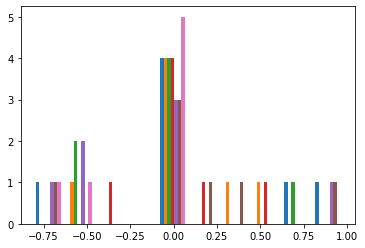

In [6]:
plt.hist(np.arcsin(esn.weights_))

In [8]:
print(esn.weights_)

[[ 6.81590717e-01  0.00000000e+00  2.48795324e-01  0.00000000e+00
  -4.98385646e-01  0.00000000e+00  1.48019319e-01 -5.28336153e-01
   0.00000000e+00  3.95026077e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.72910770e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.54774397e-01  0.00000000e+00
   5.84596121e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.76944835e-02
   0.00000000e+00  1.15187559e-01  0.00000000e+00 -3.57421965e-01
   0.00000000e+00  0.00000000e+00 -4.21016066e-01  0.00000000e+00]
 [ 5.22072408e-01  0.00000000e+00 -6.15924373e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  5.99446830e-01 -2.54604880e-01  0.00000000e+00
   0.00000000e+00 -1.10435294e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  6.42911566e-01  0.00000000e+00]
 [ 0.00

In [79]:
esn.input_weights_

array([[ 0.        , -0.79133281],
       [ 0.06728107, -0.93031874],
       [-0.29524819,  0.        ],
       [ 0.        , -0.83853097],
       [-0.73797457,  0.        ],
       [-0.79558809,  0.82483979],
       [-0.71295287, -0.93058944]])

In [5]:
i=300

In [10]:
step=[y[480000+i], y[500000+i], y[60000+i], y[200000+i]]
i += 1

In [11]:
print(esn.step(step))

[-0.08201698  0.10271518  0.07087403 -0.02058211  0.04143997 -0.04830721]


In [8]:
esn.input_weights_.dot(step)

array([-0.00576191,  0.00538854,  0.070144  , -0.00147441,  0.        ,
        0.        ])

In [27]:
esn.weights_

array([[-6.18190814e-04, -5.64924848e-01, -1.52656675e-01,
        -5.28673076e-01,  0.00000000e+00,  5.84151125e-01],
       [-5.53180569e-01,  8.03822066e-01,  0.00000000e+00,
         7.04248724e-03,  1.84029920e-02, -8.51010530e-01],
       [ 4.07201998e-01,  8.66997878e-01, -5.92502488e-01,
        -6.56200175e-01, -2.19982541e-01,  3.39588763e-01],
       [-8.73665820e-01, -2.29833706e-01,  0.00000000e+00,
         5.08516539e-01, -2.64034955e-01,  3.55941296e-01],
       [ 0.00000000e+00,  8.31086799e-01,  5.90473268e-01,
         1.93745300e-01,  1.13393973e-01,  8.74175808e-01],
       [-4.31079426e-01, -8.53494964e-01, -7.22265182e-01,
         0.00000000e+00,  8.32118591e-01, -1.49714577e-02]])

In [4]:
esn.state_

array([0., 0., 0., 0., 0., 0.])

In [82]:
count=0
outputarray=np.array(output).T
for line in outputarray:
    count+=1
    sf.write(f'soundfile{count}.wav', line, sr)